# Spline Interpolations of a given analytic function

## 0. Definitions of Plotting parameters

In [1]:
import numpy as np

a, b, n_plot = -10, 20, 1000
x_plot = np.linspace(a, b, n_plot)
print("x_plot =", x_plot)

x_plot = [-10.          -9.96996997  -9.93993994  -9.90990991  -9.87987988
  -9.84984985  -9.81981982  -9.78978979  -9.75975976  -9.72972973
  -9.6996997   -9.66966967  -9.63963964  -9.60960961  -9.57957958
  -9.54954955  -9.51951952  -9.48948949  -9.45945946  -9.42942943
  -9.3993994   -9.36936937  -9.33933934  -9.30930931  -9.27927928
  -9.24924925  -9.21921922  -9.18918919  -9.15915916  -9.12912913
  -9.0990991   -9.06906907  -9.03903904  -9.00900901  -8.97897898
  -8.94894895  -8.91891892  -8.88888889  -8.85885886  -8.82882883
  -8.7987988   -8.76876877  -8.73873874  -8.70870871  -8.67867868
  -8.64864865  -8.61861862  -8.58858859  -8.55855856  -8.52852853
  -8.4984985   -8.46846847  -8.43843844  -8.40840841  -8.37837838
  -8.34834835  -8.31831832  -8.28828829  -8.25825826  -8.22822823
  -8.1981982   -8.16816817  -8.13813814  -8.10810811  -8.07807808
  -8.04804805  -8.01801802  -7.98798799  -7.95795796  -7.92792793
  -7.8978979   -7.86786787  -7.83783784  -7.80780781  -7.77777778
 

## 1. Definition of f

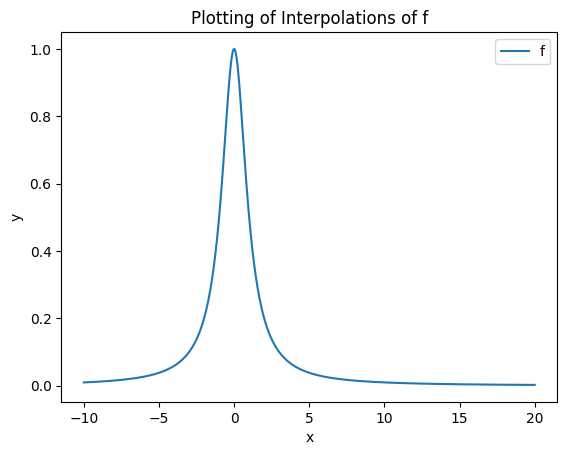

In [2]:
from utils import *

# f_exp = "cos(x)" # "1/(1+x**2)"
# def f(x):
    # return eval(f_exp, {"x": x})

f = lambda x: 1/(1+x**2)

fig, ax = set_fig()
plot_f(ax, f, x_plot)

## 2. Definition of Interpolation parameters

In [3]:
n = 20

# Defintion of Uniforms points
x_uniform = np.linspace(a, b, n)
y_uniform = [f(x) for x in x_uniform]
print("Uniforms points")
print("x_uniform =", x_uniform)
print("\ny_uniform =", y_uniform)

Uniforms points
x_uniform = [-10.          -8.42105263  -6.84210526  -5.26315789  -3.68421053
  -2.10526316  -0.52631579   1.05263158   2.63157895   4.21052632
   5.78947368   7.36842105   8.94736842  10.52631579  12.10526316
  13.68421053  15.26315789  16.84210526  18.42105263  20.        ]

y_uniform = [0.009900990099009901, 0.013905473595007899, 0.02091419964080876, 0.034842196699160305, 0.06861813343470824, 0.18408975012748605, 0.783080260303687, 0.47437582128777944, 0.1261796574624257, 0.05339446827392396, 0.028970387609341137, 0.01808526626922499, 0.01233724069580671, 0.008944277892024477, 0.006777942584630406, 0.005311870043112961, 0.004274162039284404, 0.0035130059069102097, 0.0029382798447025495, 0.0024937655860349127]


## 3. Test of Linear Spline Interpolation

In [4]:
from polynomial.newton_poly import  Spline1Poly

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
print("x =", x)
print("y =", y)
polynomial = Spline1Poly(x, y)

x = 1.5
value = polynomial.horner_eval(x)
print(f"p({x}) = {value}")

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
p(1.5) = 2.5


## 4. Uniform Linear Spline Interpolation of f

uni_linear_spline_poly(1) = 0.4846659692549763


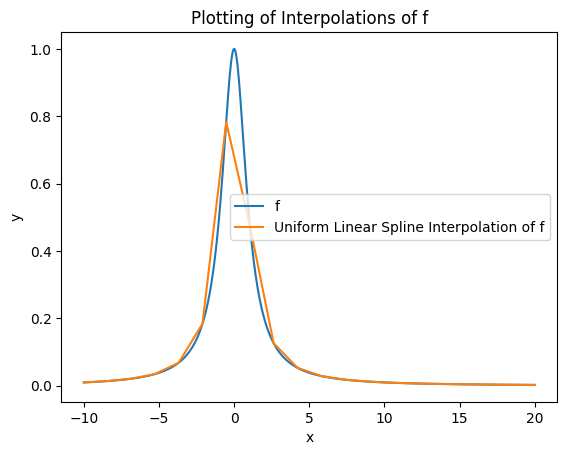

In [8]:
uni_linear_spline_poly = Spline1Poly(x_uniform, y_uniform)

x0 = 1
print(f"uni_linear_spline_poly({x0}) =", uni_linear_spline_poly.horner_eval(x0))

# print("\nx_uniform =", x_uniform)
# print("\ny_uniform =", y_uniform)

fig, ax = set_fig()
plot_f(ax, f, x_plot)

uni_linear_spline_poly.plot(ax, "Uniform Linear Spline Interpolation of f")

## 5. Uniform Cubic Spline Interpolation of f

uni_spline3_poly(1) = 0.4912553578679837


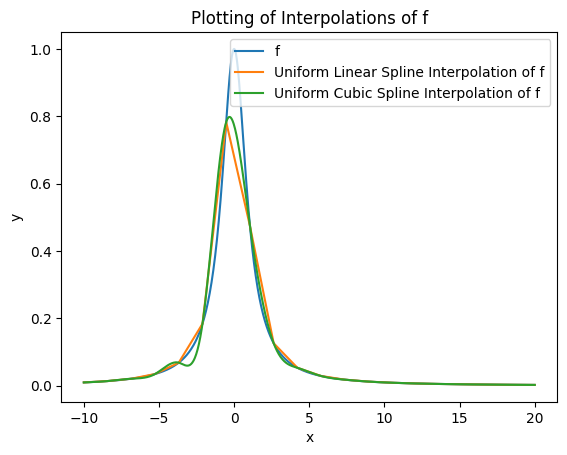

In [9]:
from polynomial.taylor_poly import Spline3Polys
      
uni_spline3_poly = Spline3Polys(x_uniform, y_uniform)

x0 = 1
print(f"uni_spline3_poly({x0}) =", uni_spline3_poly.horner_eval(x0))

fig, ax = set_fig()
plot_f(ax, f, x_plot)

# print("\nx_uniform =", x_uniform)
# print("\ny_uniform =", y_uniform)

uni_linear_spline_poly.plot(ax, "Uniform Linear Spline Interpolation of f")
uni_spline3_poly.plot(ax, n_plot, "Uniform Cubic Spline Interpolation of f")

## 6. Errors of SPline Interpolations of f

err_spline1 = 0.31804724593461703
err_spline3 = 0.2582366054864541


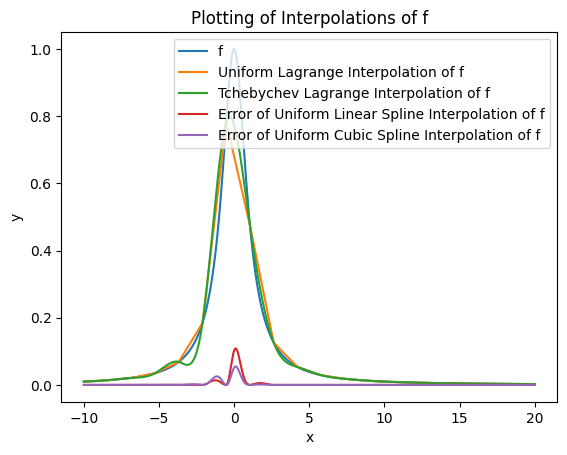

In [12]:
from integration import gauss_integration

func_err_spline1 = lambda x: (f(x) - uni_linear_spline_poly.horner_eval(x))**2
func_err_spline3 = lambda x: (f(x) - uni_spline3_poly.horner_eval(x))**2
err_spline1 = sqrt(gauss_integration(func_err_spline1, a, b))
err_spline3 = sqrt(gauss_integration(func_err_spline3, a, b))
print("err_spline1 =", err_spline1)
print("err_spline3 =", err_spline3)

fig, ax = set_fig()

plot_f(ax, f, x_plot)
uni_linear_spline_poly.plot(ax, "Uniform Linear Spline Interpolation of f")
uni_spline3_poly.plot(ax, n_plot, "Uniform Cubic Spline Interpolation of f")

y_uni_plot = [func_err_spline1(x) for x  in x_plot]
ax.plot(x_plot, y_uni_plot, label="Error of Uniform Linear Spline Interpolation of f")

y_tche_plot = [func_err_spline3(x) for x  in x_plot]
ax.plot(x_plot, y_tche_plot, label="Error of Uniform Cubic Spline Interpolation of f")

ax.legend()
